Guy Yutal - 308013861

Matan Leventer - 208447029

In [1]:
import pandas as pd
import numpy as np 
from datetime import datetime,date
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_predict
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [2]:
df = pd.read_csv("./Monthly_Homicide_USA.csv")
df.head()

,Month,Value
0,1999/01,1482
1,1999/02,1199
2,1999/03,1299
3,1999/04,1304
4,1999/05,1428


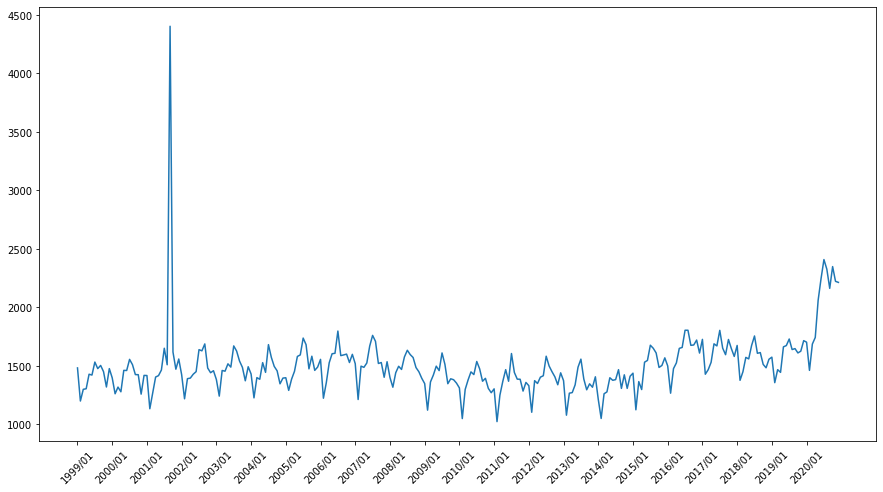

In [3]:
plt.figure(figsize=(15,8))
plt.plot(np.array(df.loc[:,'Month']), np.array(df.loc[:,'Value']))
plt.xticks([d for i,d in enumerate(df['Month']) if i % 12 ==0],rotation = 45)
plt.show()

#2#


In [4]:
msk = (df.index < len(df)-12)
df_train = df[msk].copy()
df_test = df[~msk].copy()

***2.1***

In [5]:
result = adfuller(df_train['Value'])
print('ADF Statistics: %f' % result[0])
print('P-Value: %f' % result[1])
print([str(k)+":"+str(v) for k,v in result[4].items()])

ADF Statistics: -2.187939
P-Value: 0.210652
['1%:-3.4578942529658563', '5%:-2.8736593200231484', '10%:-2.573228767361111']


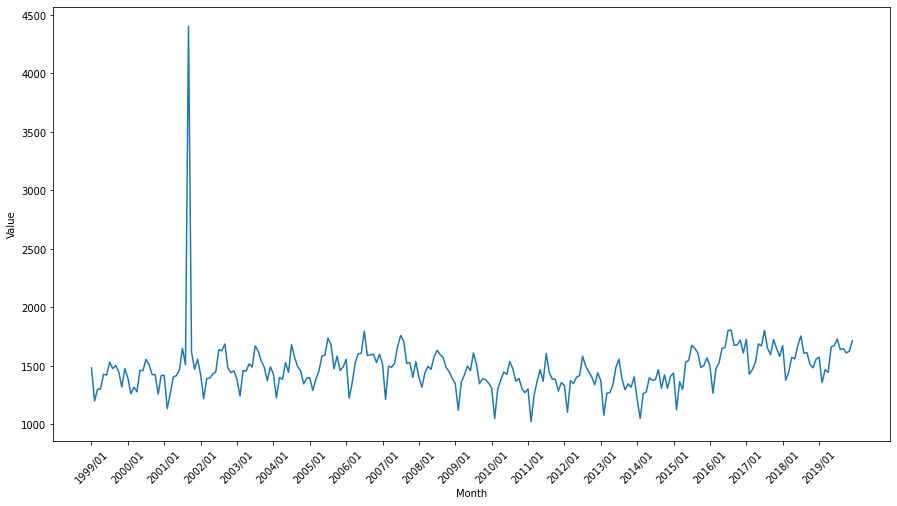

In [6]:
plt.figure(figsize=(15,8))
plt.plot(np.array(df_train.loc[:,'Month']), np.array(df_train.loc[:,'Value']))
plt.xticks([d for i,d in enumerate(df_train['Month']) if i % 12 ==0],rotation = 45)
plt.xlabel('Month')
plt.ylabel('Value')
plt.show()

***2.2***

In [7]:
result = adfuller(df_train['Value'].diff().dropna())
print('ADF Statistics: %f' % result[0])
print('P-Value: %f' % result[1])
print([str(k)+":"+str(v) for k,v in result[4].items()])

ADF Statistics: -10.841889
P-Value: 0.000000
['1%:-3.4578942529658563', '5%:-2.8736593200231484', '10%:-2.573228767361111']


In [8]:
##calculate differnce alone##
df_diffrence = df_train.copy()
df_diffrence['diff_1'] = df_diffrence['Value'].shift(1)
df_diffrence['result'] = df_diffrence['Value'] - df_diffrence['diff_1']
df_diffrence = df_diffrence.drop(['Value','diff_1'],axis=1).dropna()

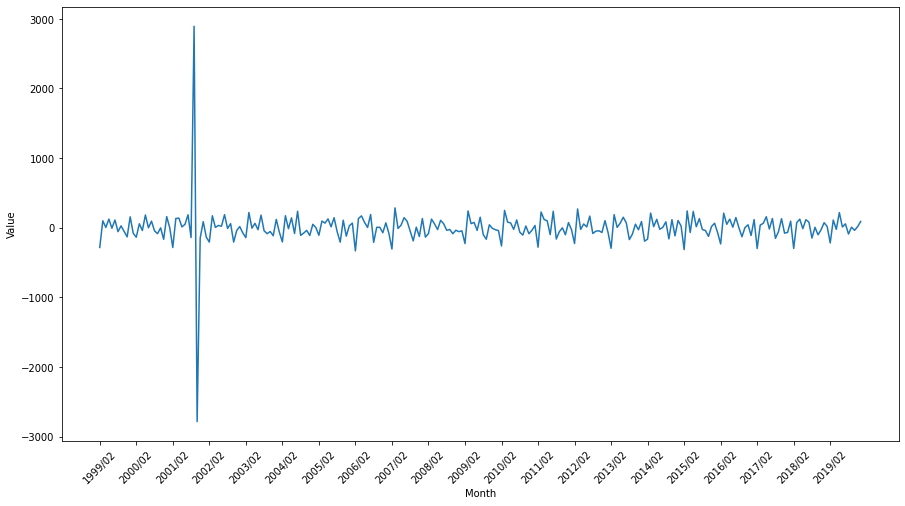

In [9]:
plt.figure(figsize=(15,8))
plt.plot(np.array(df_diffrence.loc[:,'Month']), np.array(df_diffrence.loc[:,'result']))
plt.xticks([d for i,d in enumerate(df_diffrence['Month']) if i % 12 ==0],rotation = 45)
plt.xlabel('Month')
plt.ylabel('Value')
plt.show()

***2.3***

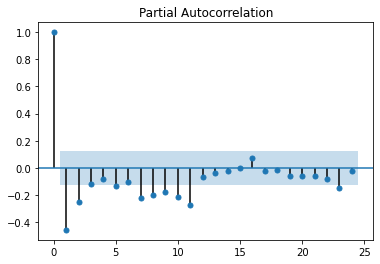

In [10]:
#partial acf#
pacf_plot = plot_pacf(df_diffrence['result'])

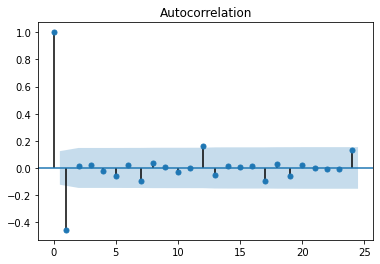

In [11]:
#acf#
pacf_plot = plot_acf(df_diffrence['result'])

***2.4***

In [12]:
#Arima#
model = ARIMA(df_train['Value'],order =(2,1,1))
model_fit = model.fit()

In [13]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Value   No. Observations:                  252
Model:                 ARIMA(2, 1, 1)   Log Likelihood               -1715.939
Date:                Sun, 04 Dec 2022   AIC                           3439.879
Time:                        11:05:17   BIC                           3453.981
Sample:                             0   HQIC                          3445.554
                                - 252                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1988      0.049      4.037      0.000       0.102       0.295
ar.L2          0.1173      0.048      2.453      0.014       0.024       0.211
ma.L1         -0.9536      0.045    -20.996      0.0

***2.5***

In [14]:
#Arima#
model_1 = ARIMA(df_train['Value'],order =(3,1,1))
model_fit_1 = model_1.fit()
print(model_fit_1.summary())

                               SARIMAX Results                                
Dep. Variable:                  Value   No. Observations:                  252
Model:                 ARIMA(3, 1, 1)   Log Likelihood               -1715.875
Date:                Sun, 04 Dec 2022   AIC                           3441.749
Time:                        11:05:18   BIC                           3459.377
Sample:                             0   HQIC                          3448.843
                                - 252                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1988      0.049      4.088      0.000       0.103       0.294
ar.L2          0.1152      0.048      2.407      0.016       0.021       0.209
ar.L3          0.0237      0.202      0.117      0.9

***2.6***

In [15]:
pred = model_fit.predict()

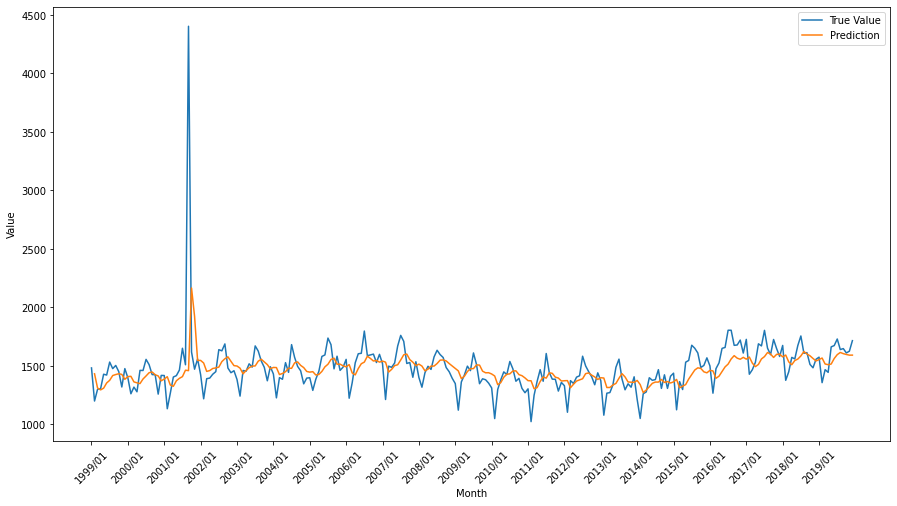

In [16]:
plt.figure(figsize=(15,8))
plt.plot(df_train['Month'].iloc[:], df_train['Value'].iloc[:], label = "True Value")
plt.plot(df_train['Month'].iloc[1:], pred.iloc[1:], label = "Prediction")
plt.xticks([d for i,d in enumerate(df_train['Month']) if i % 12 ==0],rotation = 45)
plt.legend()
plt.xlabel('Month')
plt.ylabel('Value')
plt.show()

#3#

***3.1***

In [17]:
predict_test = model_fit.predict(len(df)-len(df_test),len(df)-1)

In [18]:
for loc,i in enumerate(predict_test):
  print('Sample=%g, predicted=%f' % (len(df)-(12-loc),i))

Sample=252, predicted=1616.714029
Sample=253, predicted=1607.735489
Sample=254, predicted=1594.423073
Sample=255, predicted=1590.724107
Sample=256, predicted=1588.427522
Sample=257, predicted=1587.537220
Sample=258, predicted=1587.090905
Sample=259, predicted=1586.897776
Sample=260, predicted=1586.807043
Sample=261, predicted=1586.766358
Sample=262, predicted=1586.747629
Sample=263, predicted=1586.739135


***3.2***

In [19]:
history = [df['Value'][x] for x in range(len(df))]
predictions = list()
# walk-forward validation
for t in reversed(range(1,13)):
	model = ARIMA(history[:-t], order=(2,1,1))
	model_fit = model.fit()
	output = model_fit.predict(len(df)-t,len(df)-t)
	yhat = output[0]
	predictions.append(yhat)
	obs = df['Value'][len(df)-t]
	print('Sample=%g, predicted=%f, expected=%f' % (len(df)-t,yhat, obs))


Sample=252, predicted=1616.714029, expected=1702.000000
Sample=253, predicted=1629.085669, expected=1461.000000
Sample=254, predicted=1570.991126, expected=1686.000000
Sample=255, predicted=1593.246122, expected=1742.000000
Sample=256, predicted=1638.208599, expected=2061.000000
Sample=257, predicted=1731.241964, expected=2245.000000
Sample=258, predicted=1842.794967, expected=2408.000000
Sample=259, predicted=1954.966815, expected=2326.000000
Sample=260, predicted=1997.950945, expected=2162.000000
Sample=261, predicted=1963.979184, expected=2348.000000
Sample=262, predicted=2026.581939, expected=2222.000000
Sample=263, predicted=2045.301637, expected=2213.000000


***4***

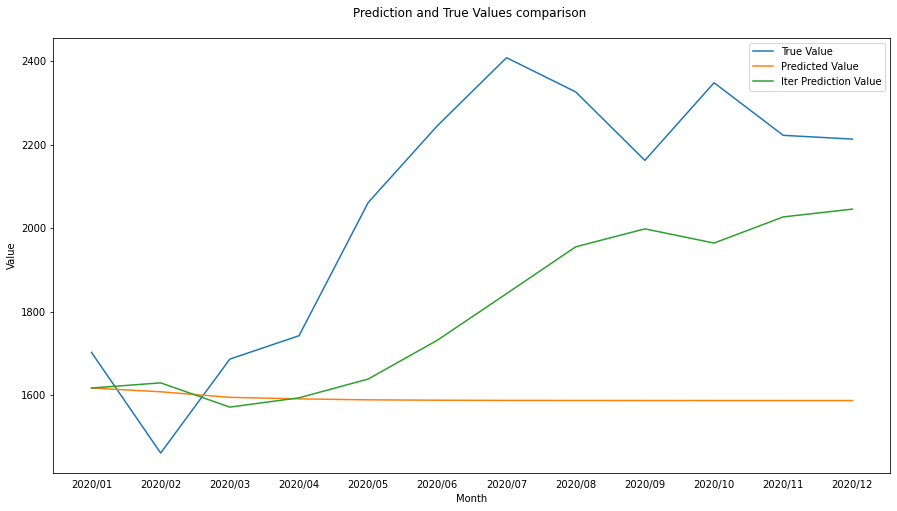

In [20]:
plt.figure(figsize=(15,8))
plt.plot(df_test['Month'],df_test['Value'])
plt.plot(df_test['Month'],predict_test.values)
plt.plot(df_test['Month'],predictions)
plt.title('Prediction and True Values comparison \n')
plt.xlabel('Month')
plt.ylabel('Value')
plt.tick_params(bottom = False)
plt.legend(['True Value','Predicted Value','Iter Prediction Value'])
plt.show()

***5***

In [21]:
from sklearn.metrics import mean_squared_error

rmse_Predicted_Value = np.sqrt(mean_squared_error(df_test['Value'], predict_test.values))
rmse_Iter_Prediction_Value = np.sqrt(mean_squared_error(df_test['Value'], predictions))

print(f'The rmse of Iter_Prediction_Value is : {rmse_Iter_Prediction_Value}')
print(f'The rmse of Predicted_Value is : {rmse_Predicted_Value}')

The rmse of Iter_Prediction_Value is : 317.7261042181907
The rmse of Predicted_Value is : 550.9002831791341
